# Bu kodlar yol takip kodlarıdır

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2

In [3]:
def read_img(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

In [4]:
center_img = 'image.jpg'
img = read_img(center_img)

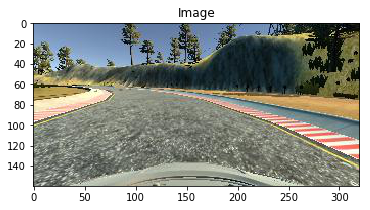

In [5]:
plt.figure(figsize=(12,3))
plt.imshow(img)
plt.title('Image')
plt.show()

In [6]:
def crop(image):
    # y ekseni boyunca sadece yol olarak alınacak sınırlar
    HORIZON=60
    BONNET=136
    """
    Crop the image between the given delimiters for the
    horizon and the bonnet of the car.
    """
    shape = image.shape
    
    cropped = image[HORIZON:BONNET,0:shape[1],:]
    
    return cropped

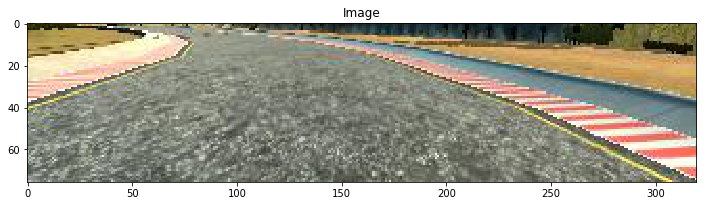

In [7]:
crop_img = crop(img)
plt.figure(figsize=(12,3))
plt.imshow(crop_img)
plt.title('Image')
plt.show()

Kestiğimiz resmi deep learning için daha uygun hale getiriyoruz.

In [8]:
def resize(image, resize_dim):
    return cv2.resize(image,resize_dim,cv2.INTER_AREA)

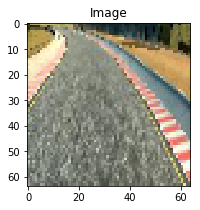

In [9]:
crop_img = crop(img)
img4feed = resize(crop_img, resize_dim=(64,64))
plt.figure(figsize=(12,3))
plt.imshow(img4feed)
plt.title('Image')
plt.show()

Daha önce eğitilmiş olan cnn için resim uygun hale getirilmiş bulunmaktadır.

In [10]:
crop_img = crop(img)
resize_img = resize(crop_img, resize_dim=(64,64))
transformed_image_array = np.expand_dims(resize_img, axis=0)
print('transformad \n',transformed_image_array)
print('resize \n',resize_img)

transformad 
 [[[[ 55  55   3]
   [166 159 120]
   [179 164 123]
   ...
   [127 121  70]
   [118 115  64]
   [133 131  79]]

  [[ 52  57   9]
   [ 37  35   0]
   [ 51  41   1]
   ...
   [140 135  80]
   [102 100  42]
   [122 121  62]]

  [[ 46  53  14]
   [ 88  90  60]
   [ 99  95  50]
   ...
   [126 121  65]
   [105 103  43]
   [108 107  43]]

  ...

  [[138 143 136]
   [105 110 103]
   [137 142 135]
   ...
   [111 115  71]
   [ 91  84  90]
   [233 174 157]]

  [[142 147 140]
   [111 116 109]
   [117 122 115]
   ...
   [128 104  53]
   [ 92  97 103]
   [133 122 101]]

  [[156 161 154]
   [121 126 119]
   [111 116 109]
   ...
   [243 227 164]
   [ 95 103  83]
   [ 94 104  91]]]]
resize 
 [[[ 55  55   3]
  [166 159 120]
  [179 164 123]
  ...
  [127 121  70]
  [118 115  64]
  [133 131  79]]

 [[ 52  57   9]
  [ 37  35   0]
  [ 51  41   1]
  ...
  [140 135  80]
  [102 100  42]
  [122 121  62]]

 [[ 46  53  14]
  [ 88  90  60]
  [ 99  95  50]
  ...
  [126 121  65]
  [105 103  43]
  [108 10

Kümedeki parantez sayısı artmış bulunmaktadır.

C:\Users\muham\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1109: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(data_format="channels_last", kernel_size=(5, 5), filters=24, kernel_regularizer=None, kernel_initializer="glorot_uniform", name="convolution2d_1", bias_constraint=None, activity_regularizer=None, activation="linear", kernel_constraint=None, bias_regularizer=None, trainable=True, strides=[2, 2], padding="same", use_bias=True)`
  return cls(**config)
C:\Users\muham\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1109: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_last", strides=[1, 1], name="maxpooling2d_1", trainable=True, pool_size=[2, 2], padding="valid")`
  return cls(**config)
C:\Users\muham\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1109: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(data_format="channels_last", kernel_size=(5, 5), filters=36, kern

Loaded model from disk
-0.14726173877716064


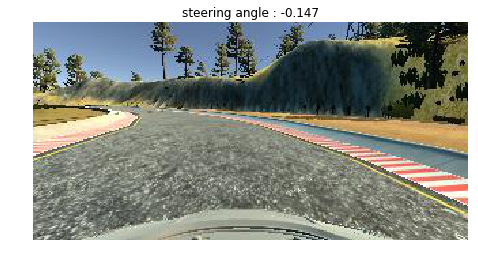

In [12]:
from keras.models import Sequential, Model
from keras.models import load_model, model_from_json
import json
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

with open('model.json', 'r') as jfile:
    model = model_from_json(jfile.read())
    
model.compile("adam", "mse")
model.load_weights("model.h5")
print("Loaded model from disk")

center_img = 'image.jpg'
img = read_img(center_img)
crop_img = crop(img)
resize_img = resize(crop_img, resize_dim=(64,64))
transformed_image_array = np.expand_dims(resize_img, axis=0)
# This model currently assumes that the features of the model are just the images. Feel free to change this.
steering_angle = float(model.predict(transformed_image_array, batch_size=1))
print(steering_angle)

plt.figure(figsize=(8,4))
plt.plot()
plt.imshow(img)
plt.title('steering angle : '+ str(np.round(float(steering_angle),3)))
plt.axis('off')
plt.show()

C:\Users\muham\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1109: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(data_format="channels_last", kernel_size=(5, 5), filters=24, kernel_regularizer=None, kernel_initializer="glorot_uniform", name="convolution2d_1", bias_constraint=None, activity_regularizer=None, activation="linear", kernel_constraint=None, bias_regularizer=None, trainable=True, strides=[2, 2], padding="same", use_bias=True)`
  return cls(**config)
C:\Users\muham\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1109: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_last", strides=[1, 1], name="maxpooling2d_1", trainable=True, pool_size=[2, 2], padding="valid")`
  return cls(**config)
C:\Users\muham\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1109: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(data_format="channels_last", kernel_size=(5, 5), filters=36, kern

Loaded model from disk
-0.14726173877716064


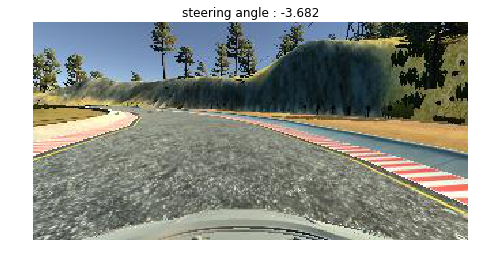

In [14]:
from keras.models import Sequential, Model
from keras.models import load_model, model_from_json
import json
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

with open('model.json', 'r') as jfile:
    model = model_from_json(jfile.read())
    
model.compile("adam", "mse")
model.load_weights("model.h5")
print("Loaded model from disk")

center_img = 'image.jpg'
img = read_img(center_img)
crop_img = crop(img)
resize_img = resize(crop_img, resize_dim=(64,64))
transformed_image_array = np.expand_dims(resize_img, axis=0)
# This model currently assumes that the features of the model are just the images. Feel free to change this.
steering_angle = float(model.predict(transformed_image_array, batch_size=1))
print(steering_angle)
steering_angle = steering_angle*25

plt.figure(figsize=(8,4))
plt.plot()
plt.imshow(img)
plt.title('steering angle : '+ str(np.round(float(steering_angle),3)))
plt.axis('off')
plt.show()